<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Tweeter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tweeter Sentiment Analysis**

**Introduction** :

In Our days, people use social media networks with a unbelievable frequency, writing posts, sharing photos and videos and sending private or public messages. One of th most used social network is Tweeter. Twitter is one of the most popular social media platforms in the world, with 330 million monthly active users and 500 million tweets sent each day. That's why analyzing tweets is very important to understand how people deal with a given subject.Understanding the sentiment of tweets is important for a variety of reasons: business marketing, politics, public behavior analysis, and information gathering are just a few examples. Sentiment analysis of Twitter data can help marketers understand the customer response to product launches and marketing campaigns, and it can also help political parties understand the public response to policy changes or announcements. Since Tweeter generate a huge amount of data (6000 tweets per second).

Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

Therefore we need to develop an Automated Machine Learning Sentiment Analysis Model in order to compute the customer perception. Due to the presence of non-useful characters (collectively termed as the noise) along with useful data, it becomes difficult to implement models on them.

**Objective** :

In this project, we are trying to implement a Twitter sentiment analysis model that helps to overcome the challenges of identifying the sentiments of the tweets.We aim to analyze the sentiment of the tweets provided from the Sentiment140 dataset by developing a machine learning pipeline involving the use of three classifiers:

**Logistic Regression.**

**Decision Tree.**

**Random Forest.**

**Bernoulli Naive Bayes.**

**K-nearest neighbors.**

**Support Vector Machine**.

Along with using Term Frequency- Inverse Document Frequency (TF-IDF).
The performance of these classifiers is then evaluated using accuracy, ROC-AUC Curve and F1 Scores.





**Project Pipeline** :

The various steps involved in the Machine Learning Pipeline are :

1️⃣ Import Necessary Dependencies.

2️⃣ Read and Load the Dataset.

3️⃣ Exploratory Data Analysis.

4️⃣ Data Preprocessing.

5️⃣ Data Visualization of Target Variables.

6️⃣ Data Visualization after Preprocessing.

7️⃣ Splitting our data into Train and Test Subset.

8️⃣ Word Embedding and Transforming Dataset using TF-IDF Vectorizer.

9️⃣ Function for Model Evaluation.

1️⃣0️⃣Model Building.

1️⃣1️⃣Conclusion.

\### 1️⃣ `Importing the necessary dependencies` :

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings

### 2️⃣ `Reading and Loading the Dataset` :

In [128]:
training_data = pd.read_csv('/content/train_E6oV3lV.csv') #to read and store in panda dataframe
testing_data = pd.read_csv('test_tweets_anuFYb8.csv') #to read and store in panda dataframe

In [129]:
training_data.shape, testing_data.shape #to print number of rows and columns

((31962, 3), (17197, 2))

In [130]:
training_data.head(5) #to print 5 sample training data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [131]:
testing_data.sample(5)

,id,tweet
2187,34150,bihday to my #godmother
5642,37605,#healthy you need five types of people. here...
15448,47411,@user with @user was so great! up next: the pu...
9993,41956,@user are you excited cause ive been excited s...
15477,47440,fucking buzzing to go away now 1month 12 days!...


In [132]:
training_data.info() #complete info of the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### 3️⃣ `Exploratory Data Analysis` :

In [133]:
training_data['label'].value_counts() #count number of positive and negative tweet

0    29720
1     2242
Name: label, dtype: int64

Text(0.5, 1.0, 'Label on tweets')

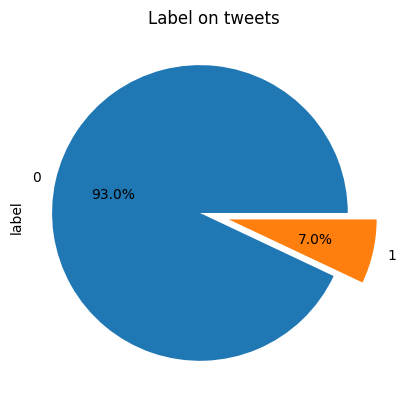

In [134]:
training_data['label'].value_counts().plot.pie(explode = [0.1,0.1], autopct='%1.1f%%')
plt.title('Label on tweets')

Text(0.5, 1.0, 'Average Word Length vs label')

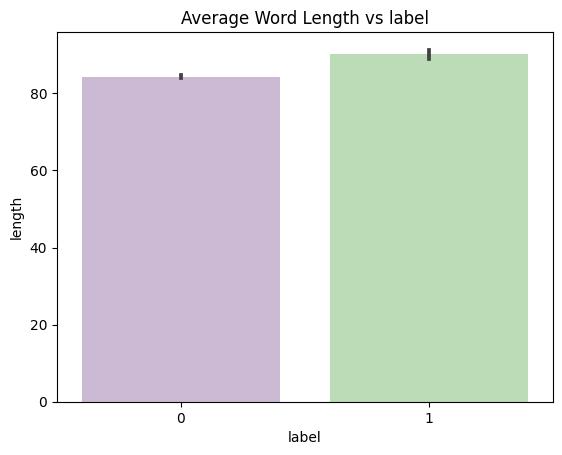

In [135]:
training_data['length'] = training_data['tweet'].apply(len)
fig1 = sns.barplot(x='label', y='length', data=training_data, palette='PRGn')
plt.title('Average Word Length vs label')

### 4️⃣  `Data Preprocessing ` :

In [136]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [137]:
# remove twitter handles (@user)
training_data['clean_tweet'] = np.vectorize(remove_pattern)(training_data['tweet'], "@[\w]*")
training_data.head(2)

,id,label,tweet,length,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause th...


In [138]:
# remove special characters, numbers and punctuations
training_data['clean_tweet'] = training_data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
training_data.head(2)

,id,label,tweet,length,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can t use cause th...


In [139]:
# individual words considered as tokens
tokenized_tweet = training_data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean_tweet, dtype: object

In [141]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')])
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, use, caus, offer, wheel...
2                                    [bihday, majesti]
3                 [#model, love, u, take, u, time, ur]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [143]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

training_data['clean_tweet'] = tokenized_tweet
training_data.head()

,id,label,tweet,length,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,122,thank #lyft credit use caus offer wheelchair v...
2,3,0,bihday your majesty,21,bihday majesti
3,4,0,#model i love u take with u all the time in ...,86,#model love u take u time ur
4,5,0,factsguide: society now #motivation,39,factsguid societi #motiv


### 5️⃣  `Data Visualization of Target Variables` :

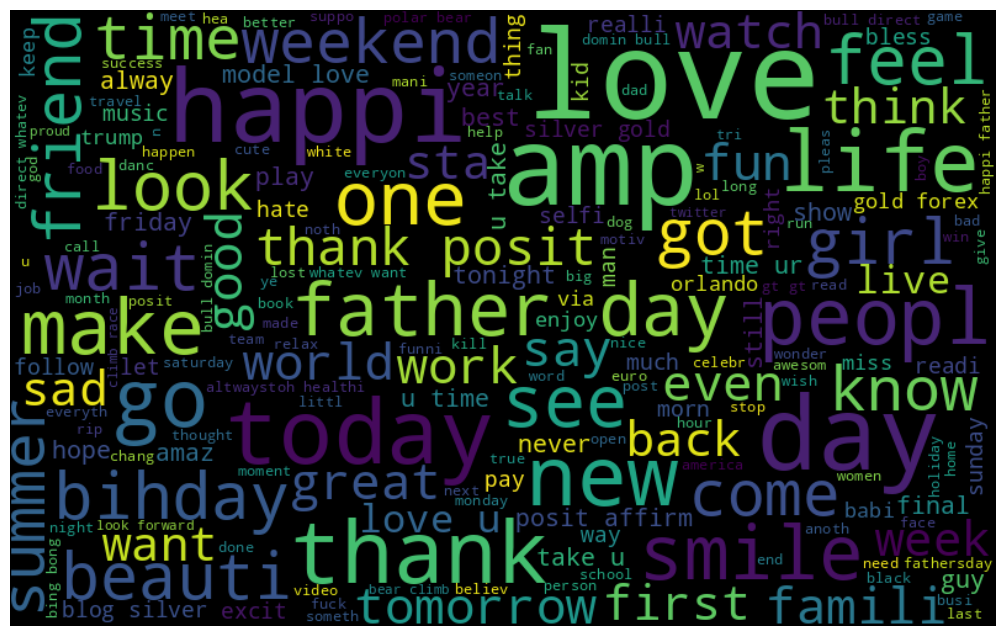

In [147]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in training_data['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

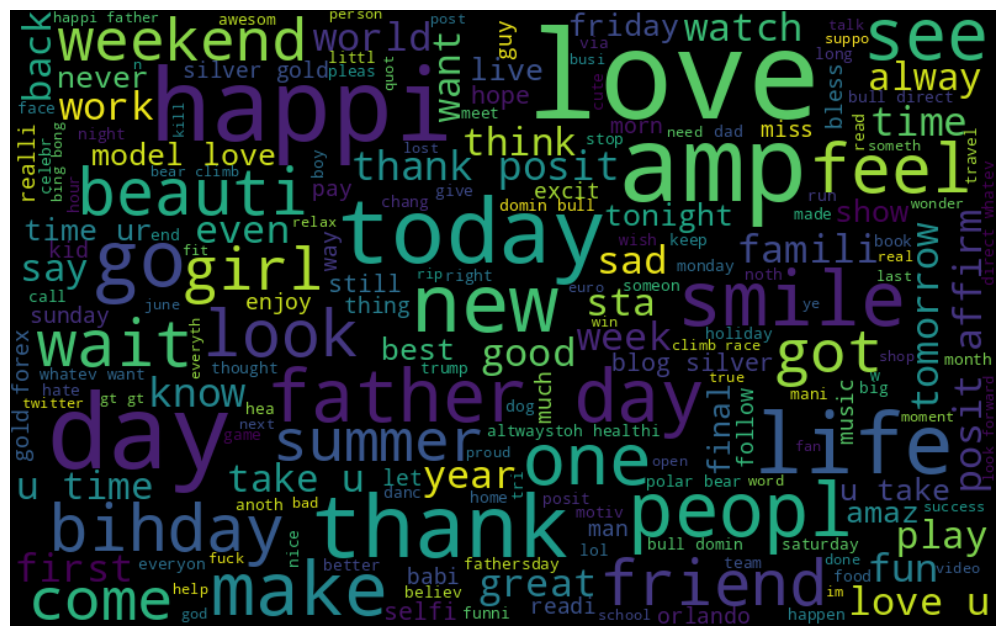

In [148]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in training_data['clean_tweet'][training_data['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

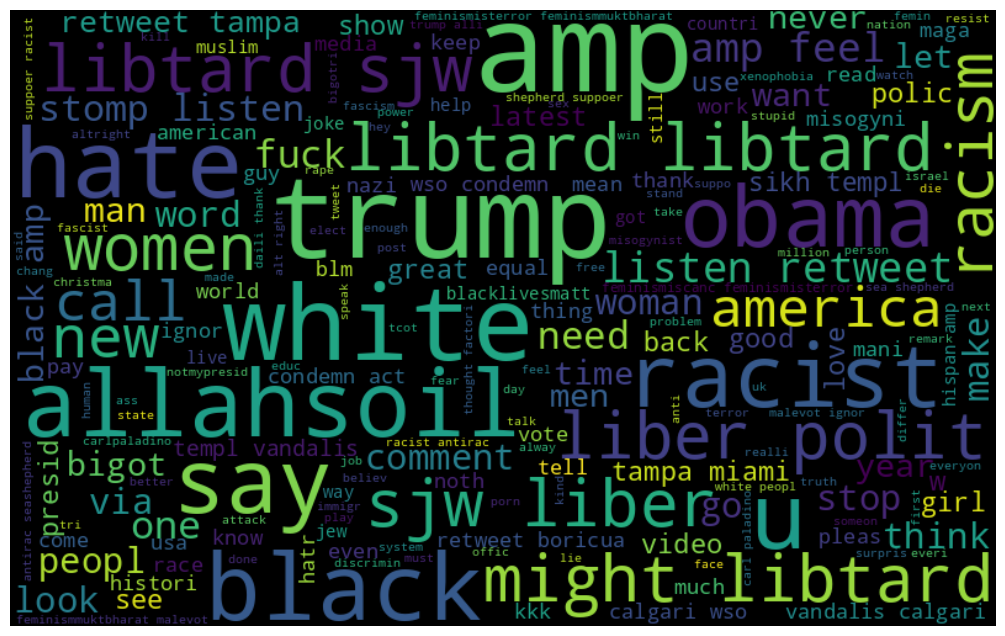

In [149]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in training_data['clean_tweet'][training_data['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [150]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [151]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(training_data['clean_tweet'][training_data['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(training_data['clean_tweet'][training_data['label']==1])

In [152]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [153]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [154]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [155]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


### 6️⃣  `Data Visualization after Preprocessing ` :

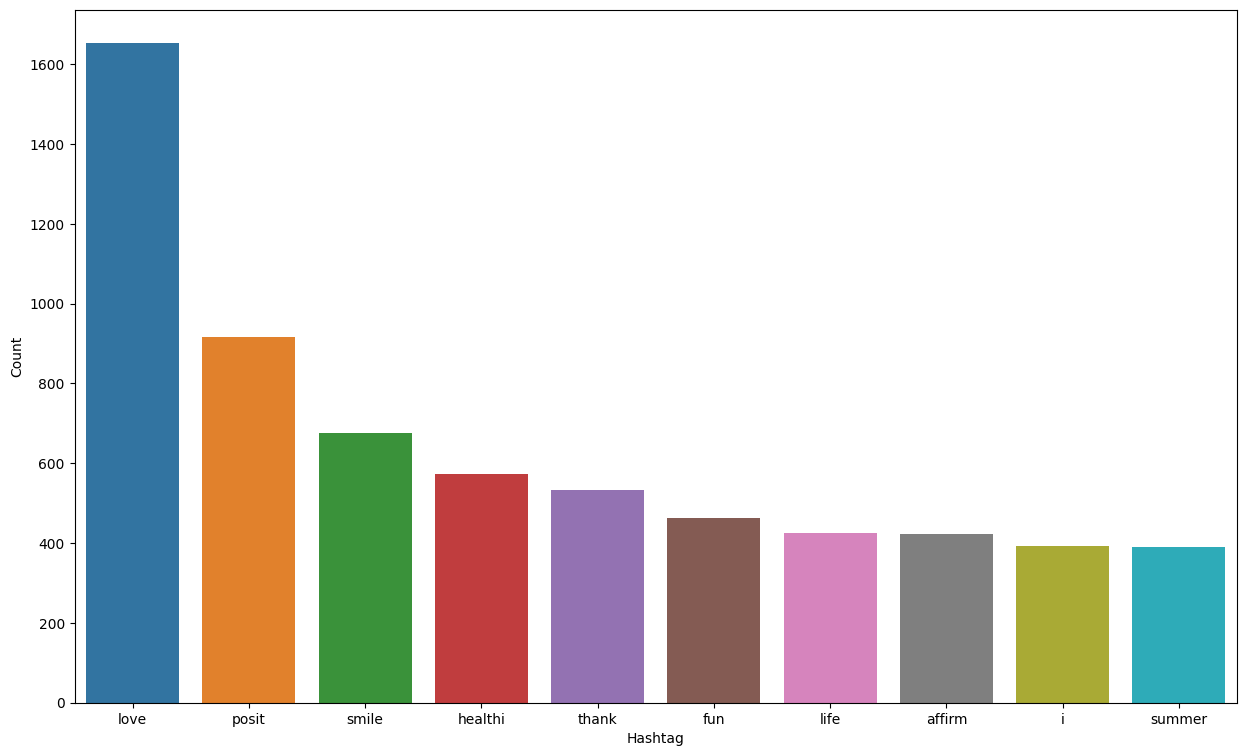

In [156]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [157]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


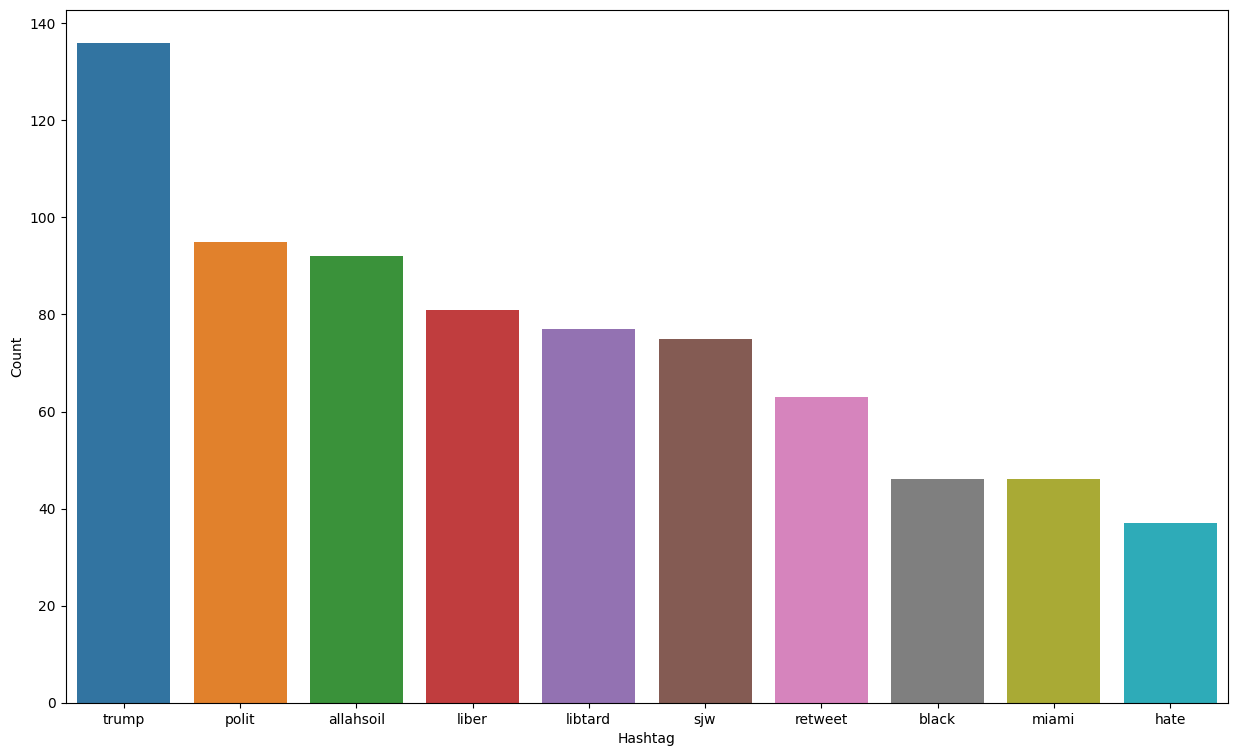

In [158]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

### 7️⃣  `Word Embedding and Transforming Dataset using TF-IDF Vectorizer` :

In [159]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(training_data['clean_tweet'])

### 8️⃣  `Splitting our data into Train and Test Subset ` :

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, training_data['label'], random_state=42, test_size=0.25)

###  9️⃣ `Function for Model Evaluation` :

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [162]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [163]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.48816936488169366

In [164]:
accuracy_score(y_test,pred)

0.948567138030284

Text(0.5, 1.0, 'Confusion Matrix')

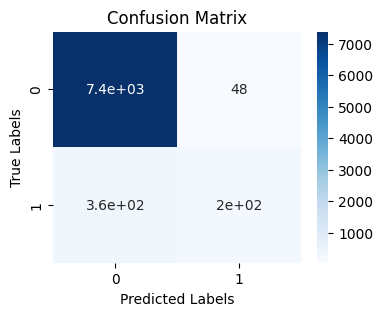

In [165]:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

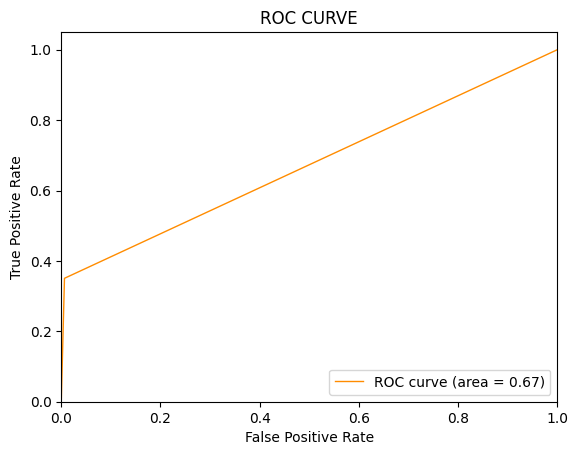

In [166]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

###  🔟 `Model Building` :

In [167]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(y_test, pred))
print(accuracy_score(y_test,pred))

0.5235294117647059
0.9391815792766862


Text(0.5, 1.0, 'Confusion Matrix')

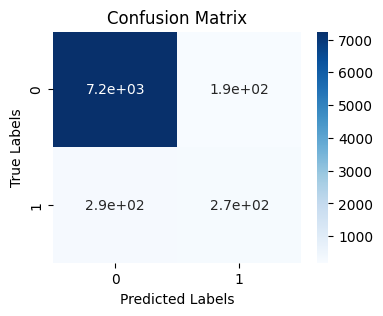

In [168]:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

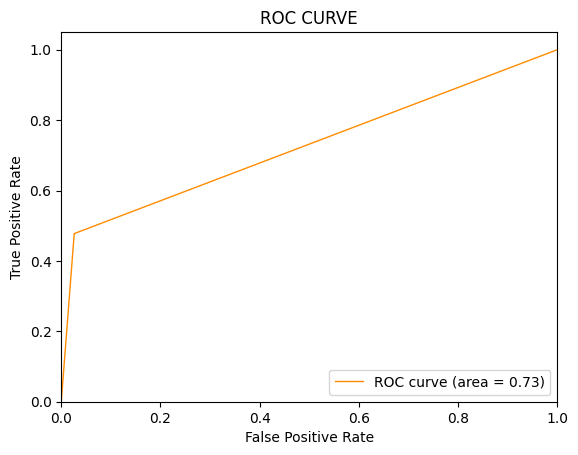

In [169]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [170]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(y_test, pred))
print(accuracy_score(y_test,pred))

0.5868131868131867
0.9529470654486297


Text(0.5, 1.0, 'Confusion Matrix')

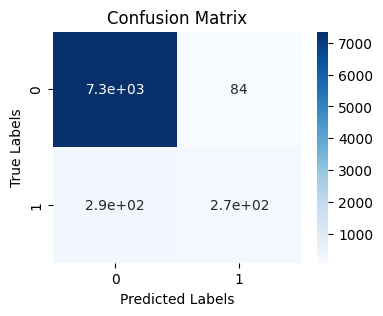

In [171]:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

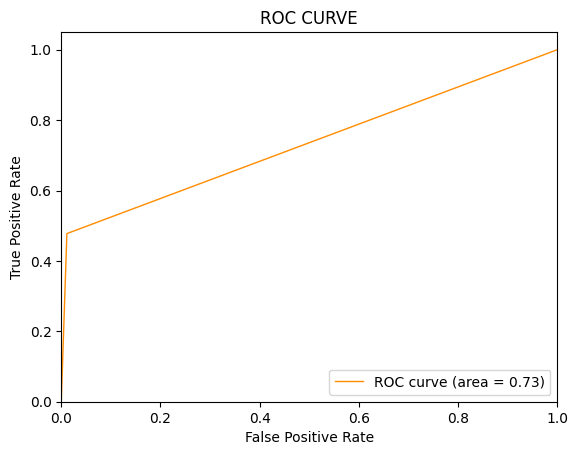

In [172]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [173]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(y_test, pred))
print(accuracy_score(y_test,pred))

0.5504587155963302
0.938681016143161


Text(0.5, 1.0, 'Confusion Matrix')

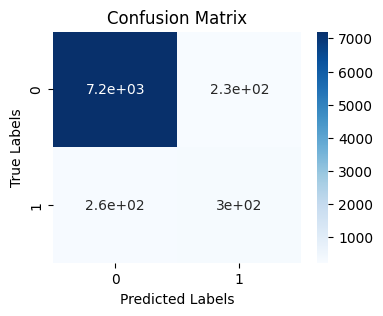

In [174]:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

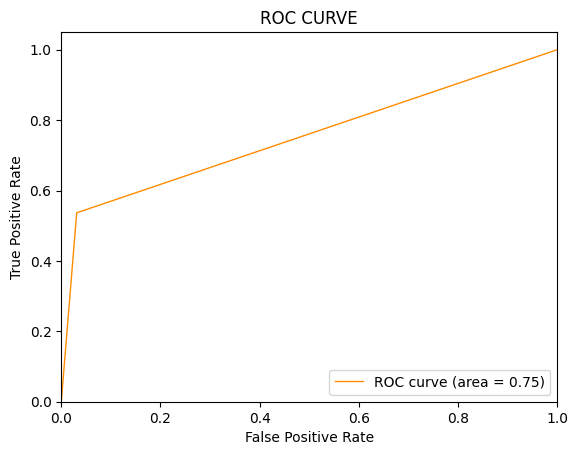

In [175]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [176]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(y_test, pred))
print(accuracy_score(y_test,pred))

0.4912663755458515
0.9416843949443123


Text(0.5, 1.0, 'Confusion Matrix')

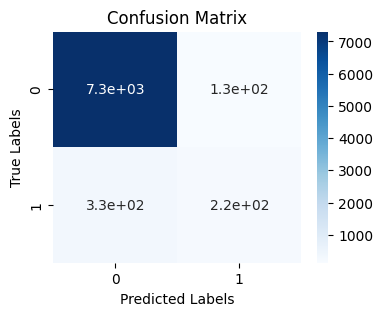

In [177]:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

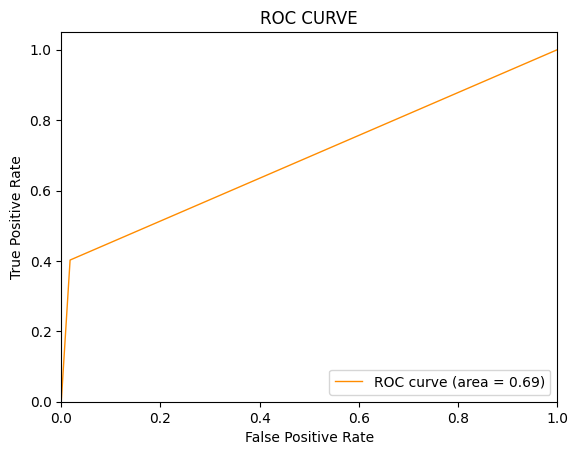

In [178]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [179]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f1_score(y_test, pred))
print(accuracy_score(y_test,pred))

0.5219512195121951
0.9509448129145288


Text(0.5, 1.0, 'Confusion Matrix')

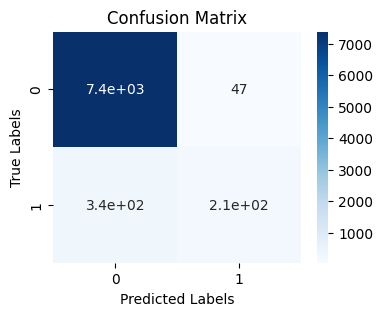

In [180]:
plt.figure(figsize = (4,3))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

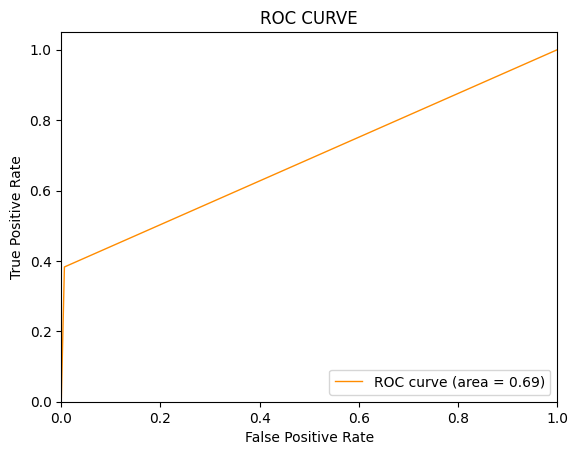

In [181]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

- We therefore conclude that **`logistic regression`** , **`Decision Tree`**, **`Random Forest`**, **`Bernoulli Naive Bayes`** & **`Suppoort Vector Machine`**  are the **best model** for the above dataset.                           

- In our problem statement, **`logistic regression`** follows **`Occam's razor principle`** which defines that for a particular problem statement, if the data has no assumptions, then the simplest model works best. Since our **dataset has no assumptions** and **logistic regression is a simple model**, so the concept holds true for the dataset mentioned above.(although it took much longer to run than the fastest model).